In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
path="Dataset"
X=[]
y=[]
person_names=[]

In [4]:
for person in os.listdir(path):
    person_path=os.path.join(path,person)

    if os.path.isdir(person_path):
        person_names.append(person)

        for img_name in os.listdir(person_path):
            img_path=os.path.join(person_path,img_name)
            img=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
            
            if(img is not None):
                img_flatten = img.flatten()
                X.append(img_flatten)
                y.append(person)
X=np.array(X)
y=np.array(y)

In [5]:
print(X.shape)
print(y.shape)

(400, 10304)
(400,)


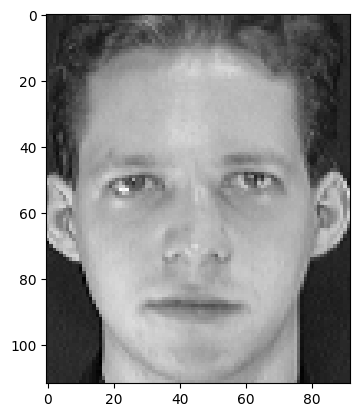

In [6]:
plt.imshow(X[0].reshape(112,92), cmap="gray")
plt.show()

In [7]:
mean_face=np.mean(X,axis=0)
X_centered = X - mean_face

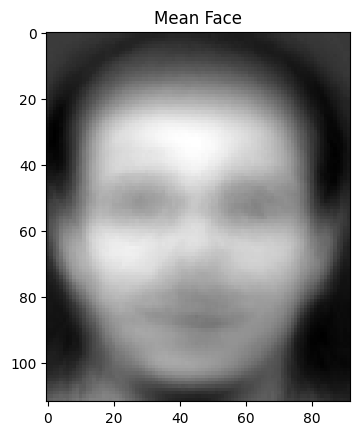

In [8]:
plt.imshow(mean_face.reshape(112,92), cmap="gray")
plt.title("Mean Face")
plt.show()

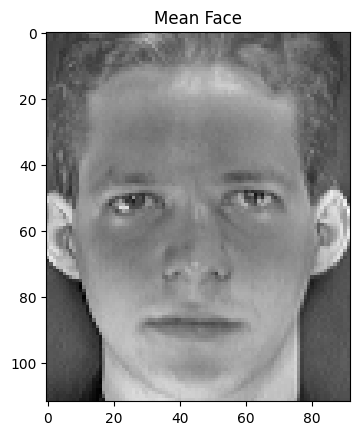

In [9]:
plt.imshow(X_centered[0].reshape(112,92), cmap="gray")
plt.title("Mean Face")
plt.show()

In [10]:
n_component=50
pca=PCA(n_component)
X_pca=pca.fit_transform(X_centered)

eigenfaces = pca.components_

print(f"Eigenfaces shape: {eigenfaces.shape}")

Eigenfaces shape: (50, 10304)


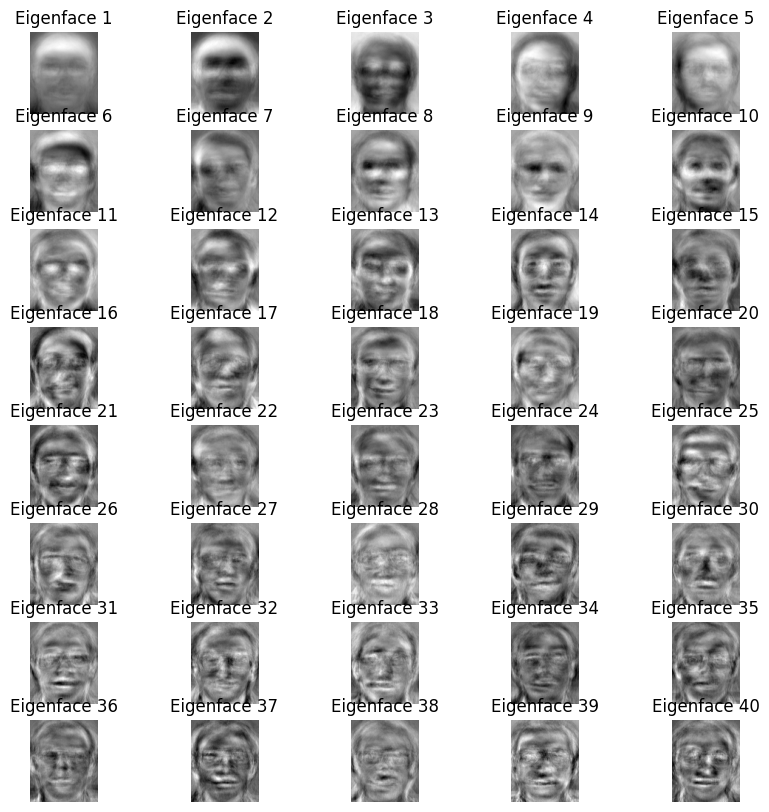

In [11]:
fig, axes = plt.subplots(8, 5, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i].reshape(112, 92), cmap='gray')
    ax.set_title(f"Eigenface {i+1}")
    ax.axis('off')

plt.show()


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y,random_state=42)

In [13]:
knn=KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [14]:
y_pred=knn.predict(X_test)

In [15]:
accuracy=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: \n{accuracy}")
print(f"Classification Report: \n{accuracy}")

Accuracy: 0.9625
Confusion Matrix: 
0.9625
Classification Report: 
0.9625


In [16]:
import pickle

In [17]:
with open("face_recognition_model.pkl","wb") as f:
    pickle.dump(knn,f)